Import all the libraries required Numpy for mathematical computing, pandas for data analyzing, seaborn & matplotlib for plotting and visualization of data and keras for neural network modelling.

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import warnings
warnings.filterwarnings('ignore')

Utilising the pandas library to load the data set and obtain the necessary details, such as the dataset's shape, maximum and minimum values, etc. The data will first be divided into training and test data, and the training data will be used to train the model.

In [124]:
train_data = pd.read_csv('Google_Stock_Price_Train.csv')

In [125]:
training_data, test_data = train_test_split(train_data, test_size=0.2, shuffle=False)

In [126]:
training_data.shape

(1006, 6)

In [127]:
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [128]:
training_data.describe()

,Open,High,Low
count,1006.000000,1006.000000,1006.000000
mean,481.099791,484.889722,476.756113
std,121.355004,122.329345,119.965669
min,279.120000,281.210000,277.220000
25%,370.937500,376.482500,368.780000
50%,517.930000,523.075000,513.620000
75%,563.692500,568.875000,558.235000
max,776.600000,779.980000,766.900000


Extracting the column that has the data of the opening stock price.

In [129]:
training_data = training_data.iloc[:, 1:2]
training_data.shape

(1006, 1)

In [130]:
training_data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


 Normalize the training data between [0,1]
the fit method, when applied to the training dataset, learns the model parameters (for example, mean and standard deviation).
We then need to apply the transform method on the training dataset to get the transformed (scaled) training dataset.
Then plotting the data using the matplotlib library.

In [131]:
mm = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = mm.fit_transform(training_data)
training_data_scaled.shape

(1006, 1)

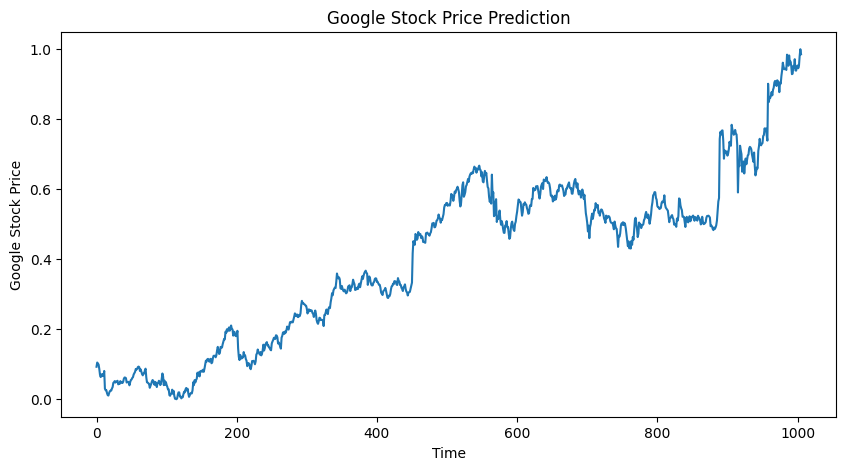

In [132]:
plt.figure(figsize=(10,5))
plt.plot(training_data_scaled);
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.show()

For training the model in this case, we are utilising the RNN network. The x_train and y_train must therefore be reshaped because they need the same architecture in order to process RNN.

In [109]:
x_train = training_data_scaled[59:1005]
y_train = training_data_scaled[60:1006]
print(x_train.shape)
print(y_train.shape)

(946, 1)
(946, 1)


In [135]:
x_train = np.reshape(x_train, (946,1,1))
print(x_train.shape)

(946, 1, 1)


In [136]:
regressor = Sequential()
#first hidden layer
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
#second hidden layer
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
#third hidden layer
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
#fourth hidden layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
#Dense layer to get final output
regressor.add(Dense(units = 1))


ADAM optimization algorithm is used and a mean squared error loss function is optimized. This will be the same metric that we will use to evaluate the performance of the model to find the global minimum error.

In [137]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 9s 8ms/step - loss: 0.1810
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0502
Epoch 3/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0288
Epoch 4/100
30/30 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 5/100
30/30 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 6/100
30/30 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 7/100
30/30 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 8/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 9/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0043
Epoch 10/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0043
Epoch 11/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0043
Epoch 12/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0033
Epoch 13/100
30/30 [============

In [147]:
test_stock = test_data.iloc[:,1:2]
len(test_stock)

252

Following the same steps as above, we will attempt to predict the stock prices for the test data after training the model on the training set. Visualizing the results by comparing the plots.

In [149]:
input_value = test_stock
input_value = mm.transform(input_value)
input_value = np.reshape(input_value, (252, 1, 1))

In [150]:
prediction = regressor.predict(input_value)
prediction = mm.inverse_transform(prediction)

8/8 [==============================] - 0s 4ms/step


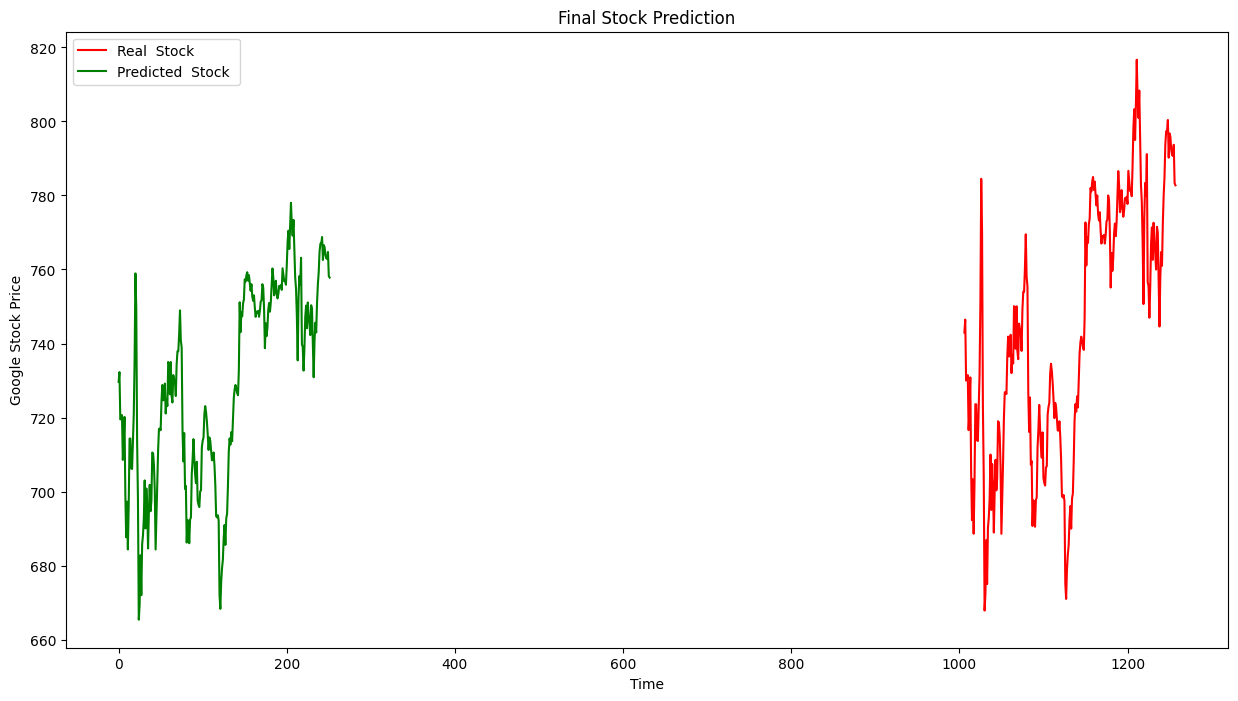

In [151]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.plot(test_stock, color = 'red', label = 'Real  Stock ')
plt.plot(prediction, color = 'green', label = 'Predicted  Stock ')
plt.title('Final Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()